Random forests have the ability to greatly increase performance based on expanding ideas from the decision tree. They are also known as ensemble learners, since they rely on an ensemble of models (multiple decision trees).

# Motivation and History

Why not continue to use decision trees?

What is the motivation on random forests and how do they improve on decision trees?

Even with hyperparameter adjustments, the single decision tree is still limited:

- Single feature for root node.
- Splitting criteria can lead to some features not being used.
- Potential for overfitting to data.

**Create subsets of randomly picked features at each potential split**.

# Hyperparameters

Since a random forest is an ensemble of many decision trees, many of the hyperparameters between both models are shared.

Hyperparameters for Random Forests:
- Number of estimators (How many decision trees to use in the forest)
- Number of features (How many features to include in each subset)
- Bootstrap samples (Allow for bootstrap sampling of each training subset?)
- Out-of-bag error (Calculate OOB error during training?)

## Number of Estimators and Features

**Number of estimators**:
- Intuitively, we know the more decision trees, the more opportunities to learn from a variety of feature subset combinations.
- But is there a danger to overfitting?
- Is there a limit to adding more trees?

**Random forests CANNOT overfit**

How to choose the number of trees?:
- Reasonable default = 100
- Publication suggests 64-128
- Cross validate a grid search of trees.
- Plot error vs number of trees (similar to elbow method for KNN).
- Should notice diminishing error reduction after some N trees.

Why does random forests not overfit?:
- After a certain number of trees, two things can occur...
- Different random selections don't reveal any more information.
- Trees become highly correlated.
- Different random selections are essentially just duplicates of trees.

**Number of features**:
- Starting point sqrt(N) etc... then do gridsearch a little higher or lower such as (N/3) for regression tasks.

## Bootstrapping and Out-of-Bag Error

Bootstrapping is random sampling with replacement. To further differentiate trees, we can bootstrap a selection of rows of data for each split, rather than just using a subset of features.

Bootstrapping is yet another parameter used to reduce correlation between trees, since the trees are trained on different subsets of feature columns and data rows.


---

We use the out-of-bag rows to calculate out-of-bag error. These are the rows that the decision tree has not seen before when we did bootstrapping of rows.

Note that OOB score is a hyperparameter that doesn't really affect the training process. OOB is an optional way of measuring performance, an alternative to using a standard train/test split, since bootstrapping results in naturally unused data during training.

OOB score is also limited to not using all the trees in the random forest, it can only be calculated on trees that did not use the OOB data.

Because it doesn't use the entire random forest, the default value of OOB score hyperparameter is False.

# Random Forests for Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df = df.dropna()

In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [6]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [7]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,1,0,1


In [8]:
y = df['species']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
# help(RandomForestClassifier)

In [13]:
rfc = RandomForestClassifier(n_estimators=10,
                            max_features='auto',
                            random_state=101)

# Random state here is the random state when 
# randomly selecting features at each split. 
# Useful when fairly evaluating models against each other.

In [14]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [15]:
preds = rfc.predict(X_test)

In [16]:
preds

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'A

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

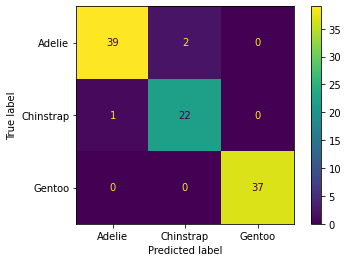

In [18]:
plot_confusion_matrix(rfc,X_test,y_test)

In [19]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [20]:
rfc.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

# Exploring Hyperparameters on a Larger Data Set

In [21]:
df = pd.read_csv('data_banknote_authentication.csv')

In [22]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


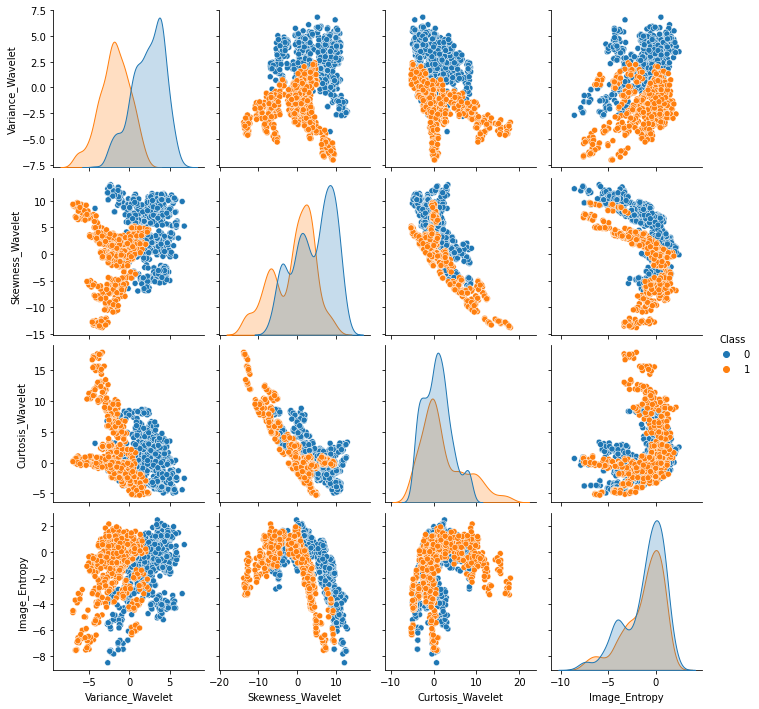

In [23]:
sns.pairplot(df,hue='Class')

In [24]:
X = df.drop('Class',axis=1)

In [25]:
y = df['Class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
n_estimators = [64,100,128,200]

In [29]:
max_features = [2,3,4]

In [30]:
bootstrap = [True,False]

In [31]:
oob_score = [True,False]

In [32]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [33]:
rfc = RandomForestClassifier()

In [34]:
grid = GridSearchCV(rfc,param_grid)

In [35]:
grid.fit(X_train,y_train)

C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Edward

C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Edward

C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Edward

C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Edward

C:\Users\Edward2\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.99399875 0.99485345 0.99399875 0.99399875 0.99314038 0.99399875
 0.99399875 0.99399875 0.99399875 0.99399875 0.99314038 0.99314038
 0.99142365 0.99399875 0.99399875 0.99314038 0.98627343 0.98799017
 0.9871318  0.9871318  0.98799017 0.98799017 0.9871318  0.98799017
        nan 0.99484979        nan 0.99399142        nan 0.99313672
        nan 0.99484979        nan 0.99056528        nan 0.99142365
        nan 0.99228201        nan 0.99314038        nan 0.97855545
        nan 0.97941015        nan 0.97684604        nan 0.98026852]
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [36]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': False}

In [37]:
rfc = RandomForestClassifier(max_features=2,n_estimators=64,oob_score=True)

In [38]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=64, oob_score=True)

In [39]:
rfc.oob_score_

0.9939965694682675

In [40]:
predictions = rfc.predict(X_test)

In [41]:
from sklearn.metrics import plot_confusion_matrix,classification_report,accuracy_score

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       124
           1       0.99      1.00      0.99        82

    accuracy                           1.00       206
   macro avg       0.99      1.00      0.99       206
weighted avg       1.00      1.00      1.00       206



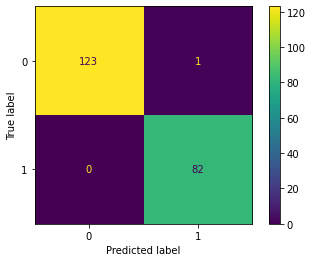

In [43]:
plot_confusion_matrix(rfc,X_test,y_test)

In [44]:
errors = []
misclassifications = []

for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    n_missed = np.sum(preds != y_test)
    
    errors.append(err)
    misclassifications.append(n_missed)

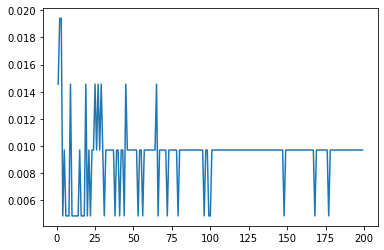

In [45]:
plt.plot(range(1,200),errors)

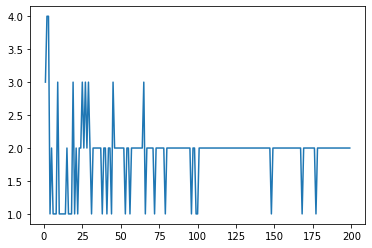

In [46]:
plt.plot(range(1,200),misclassifications)

# Random Forests for Regression

## Linear Regression

In [47]:
df = pd.read_csv('rock_density_xray.csv')

In [48]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [49]:
df.columns = ['Signal','Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

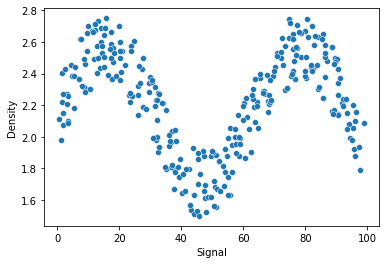

In [50]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [56]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr_model = LinearRegression()

In [60]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [61]:
lr_preds = lr_model.predict(X_test)

In [62]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [64]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [67]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [68]:
signal_range = np.arange(0,100)

In [70]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [71]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

In [74]:
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

In [75]:
y_test

176    2.179775
250    2.621238
12     2.231671
16     2.320837
258    1.908089
281    1.789537
226    2.263986
284    2.148269
147    2.496735
228    2.442191
235    1.897325
123    1.923440
221    2.266713
270    2.192791
78     2.415050
89     2.661302
4      2.452374
143    2.656490
19     2.343174
259    2.360571
200    2.261214
41     2.038879
208    2.543720
15     2.545491
153    2.300750
285    2.359919
169    1.999187
265    1.658609
13     2.431704
212    2.300320
Name: Density, dtype: float64

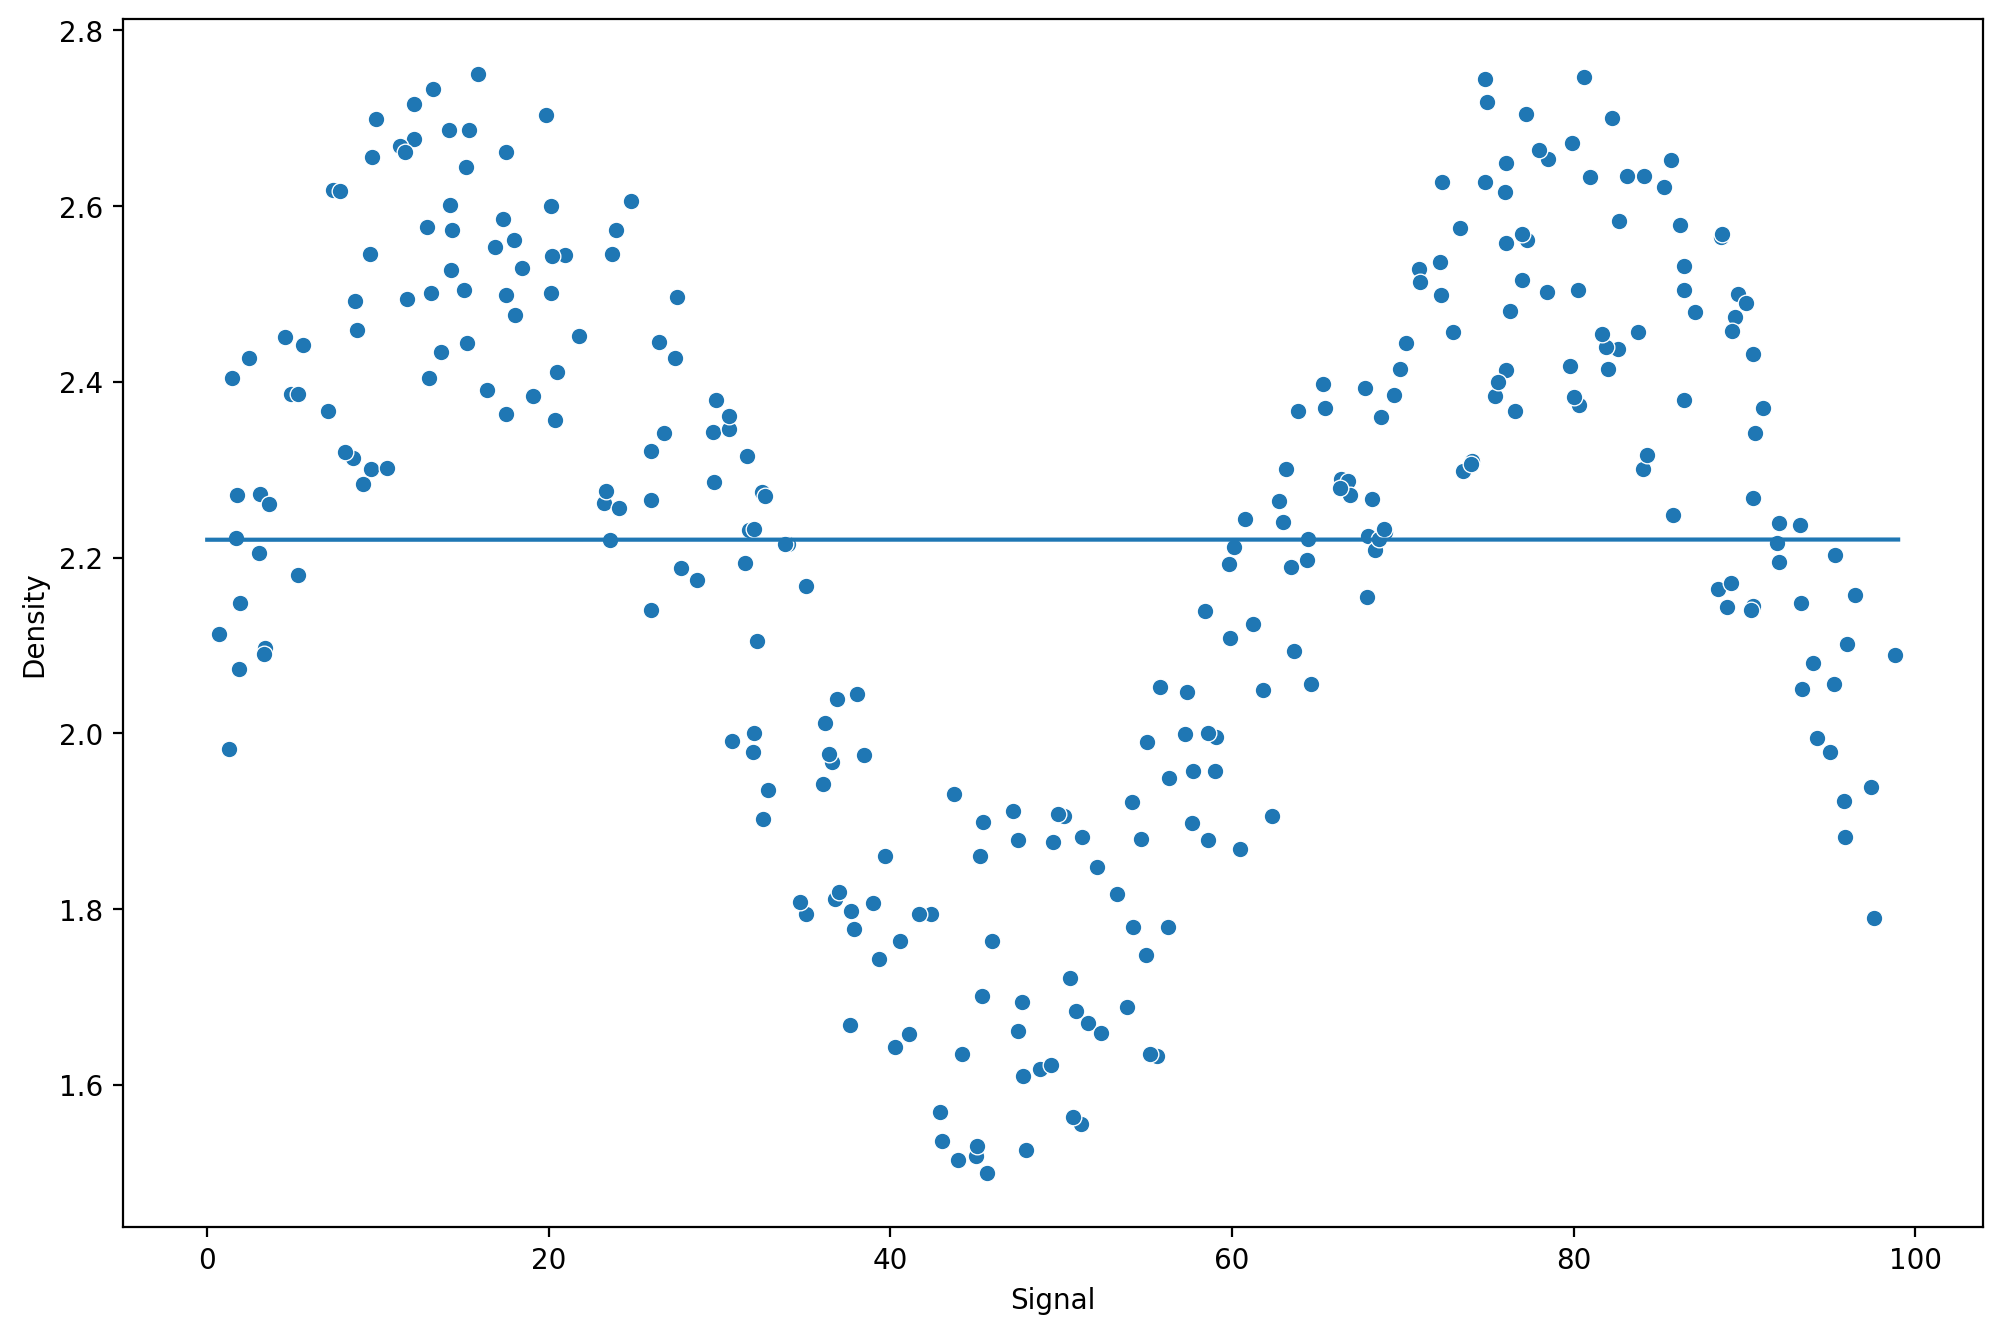

In [73]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

plt.plot(signal_range,signal_preds)

**Linear Regression is NOT suitable for predicting a continuous label for this data set**

## Polynomial Regression

In [76]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # FIT MODEL TRAINING
    model.fit(X_train,y_train)
    # GET METRICS
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    # PLOT RESULTS SIGNAL RANGE
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')

    plt.plot(signal_range,signal_preds)

In [79]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [84]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

MAE: 0.11969197005620795
RMSE: 0.13807557849778548


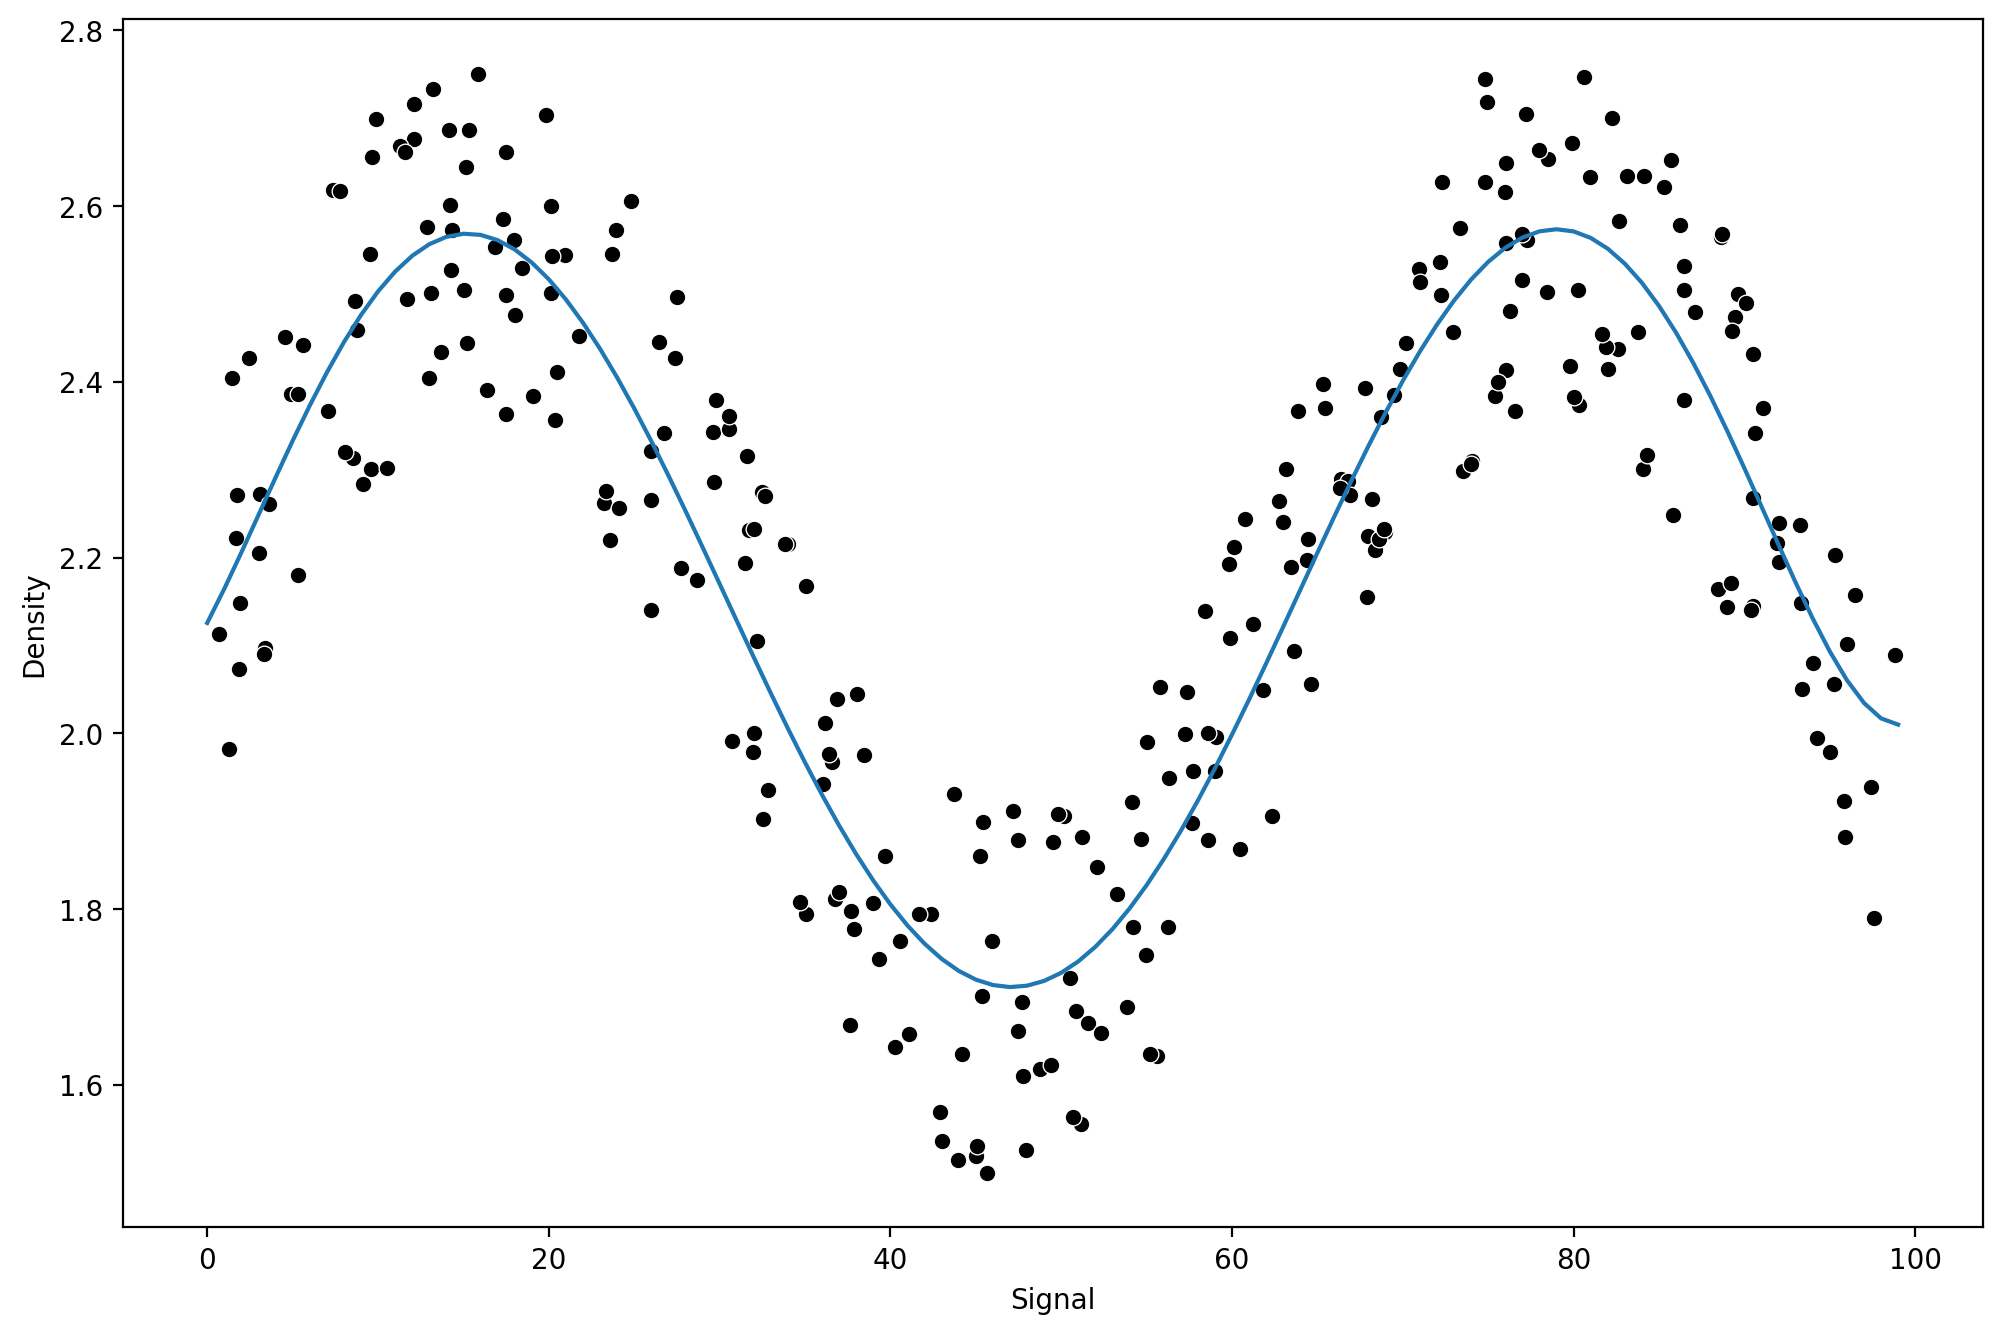

In [85]:
run_model(pipe,X_train,y_train,X_test,y_test)

**How can we predict density when signal is greater than 100?**

## Decision Tree Regression, Support Vector Regression, K Nearest Neighbours Regression and Random Forest Regression

## KNNR

In [86]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926


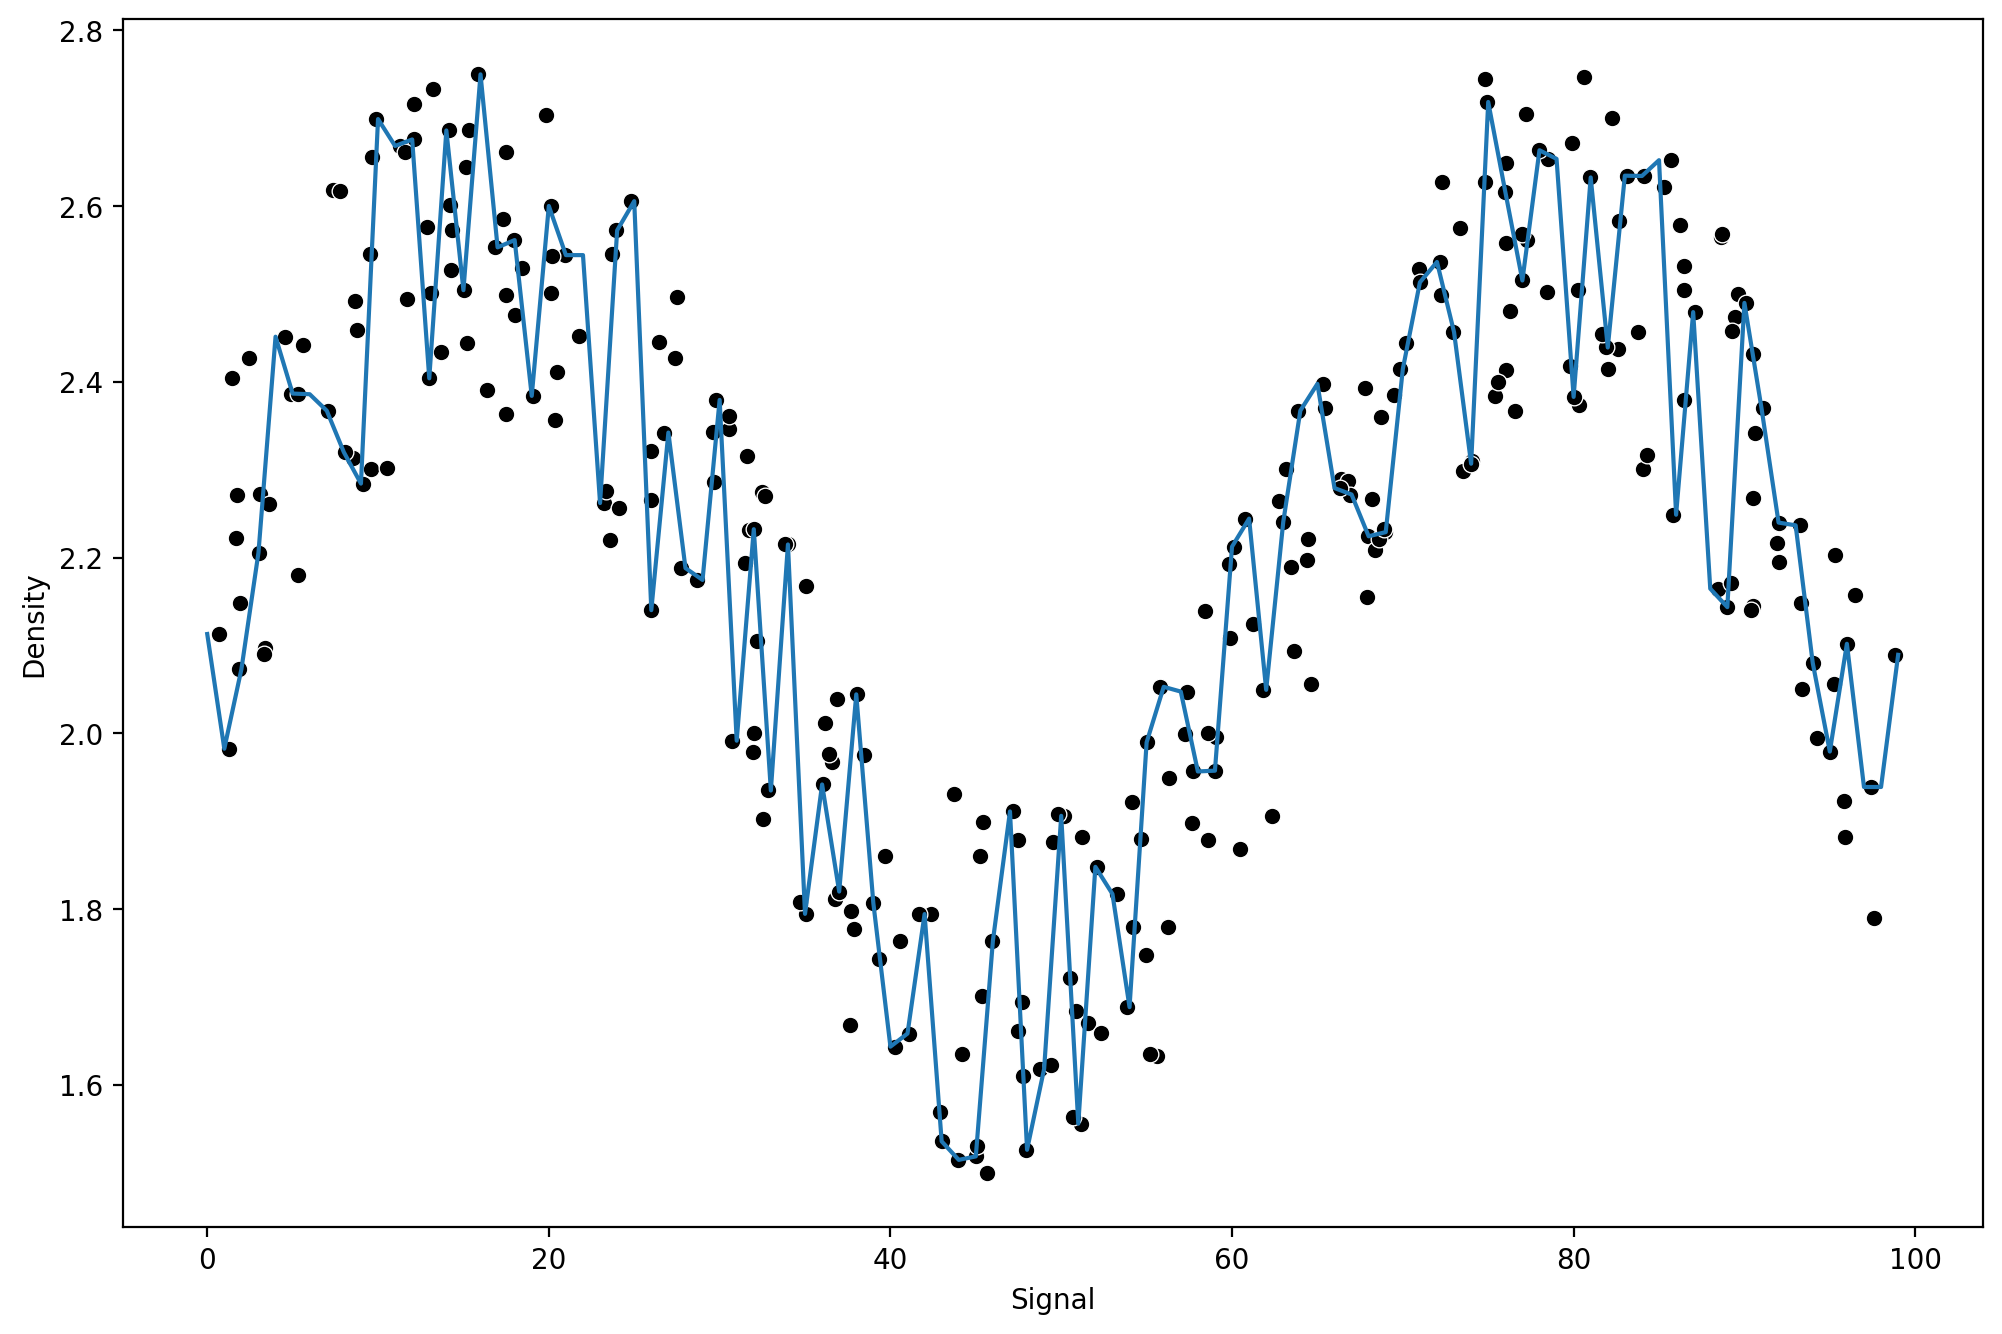

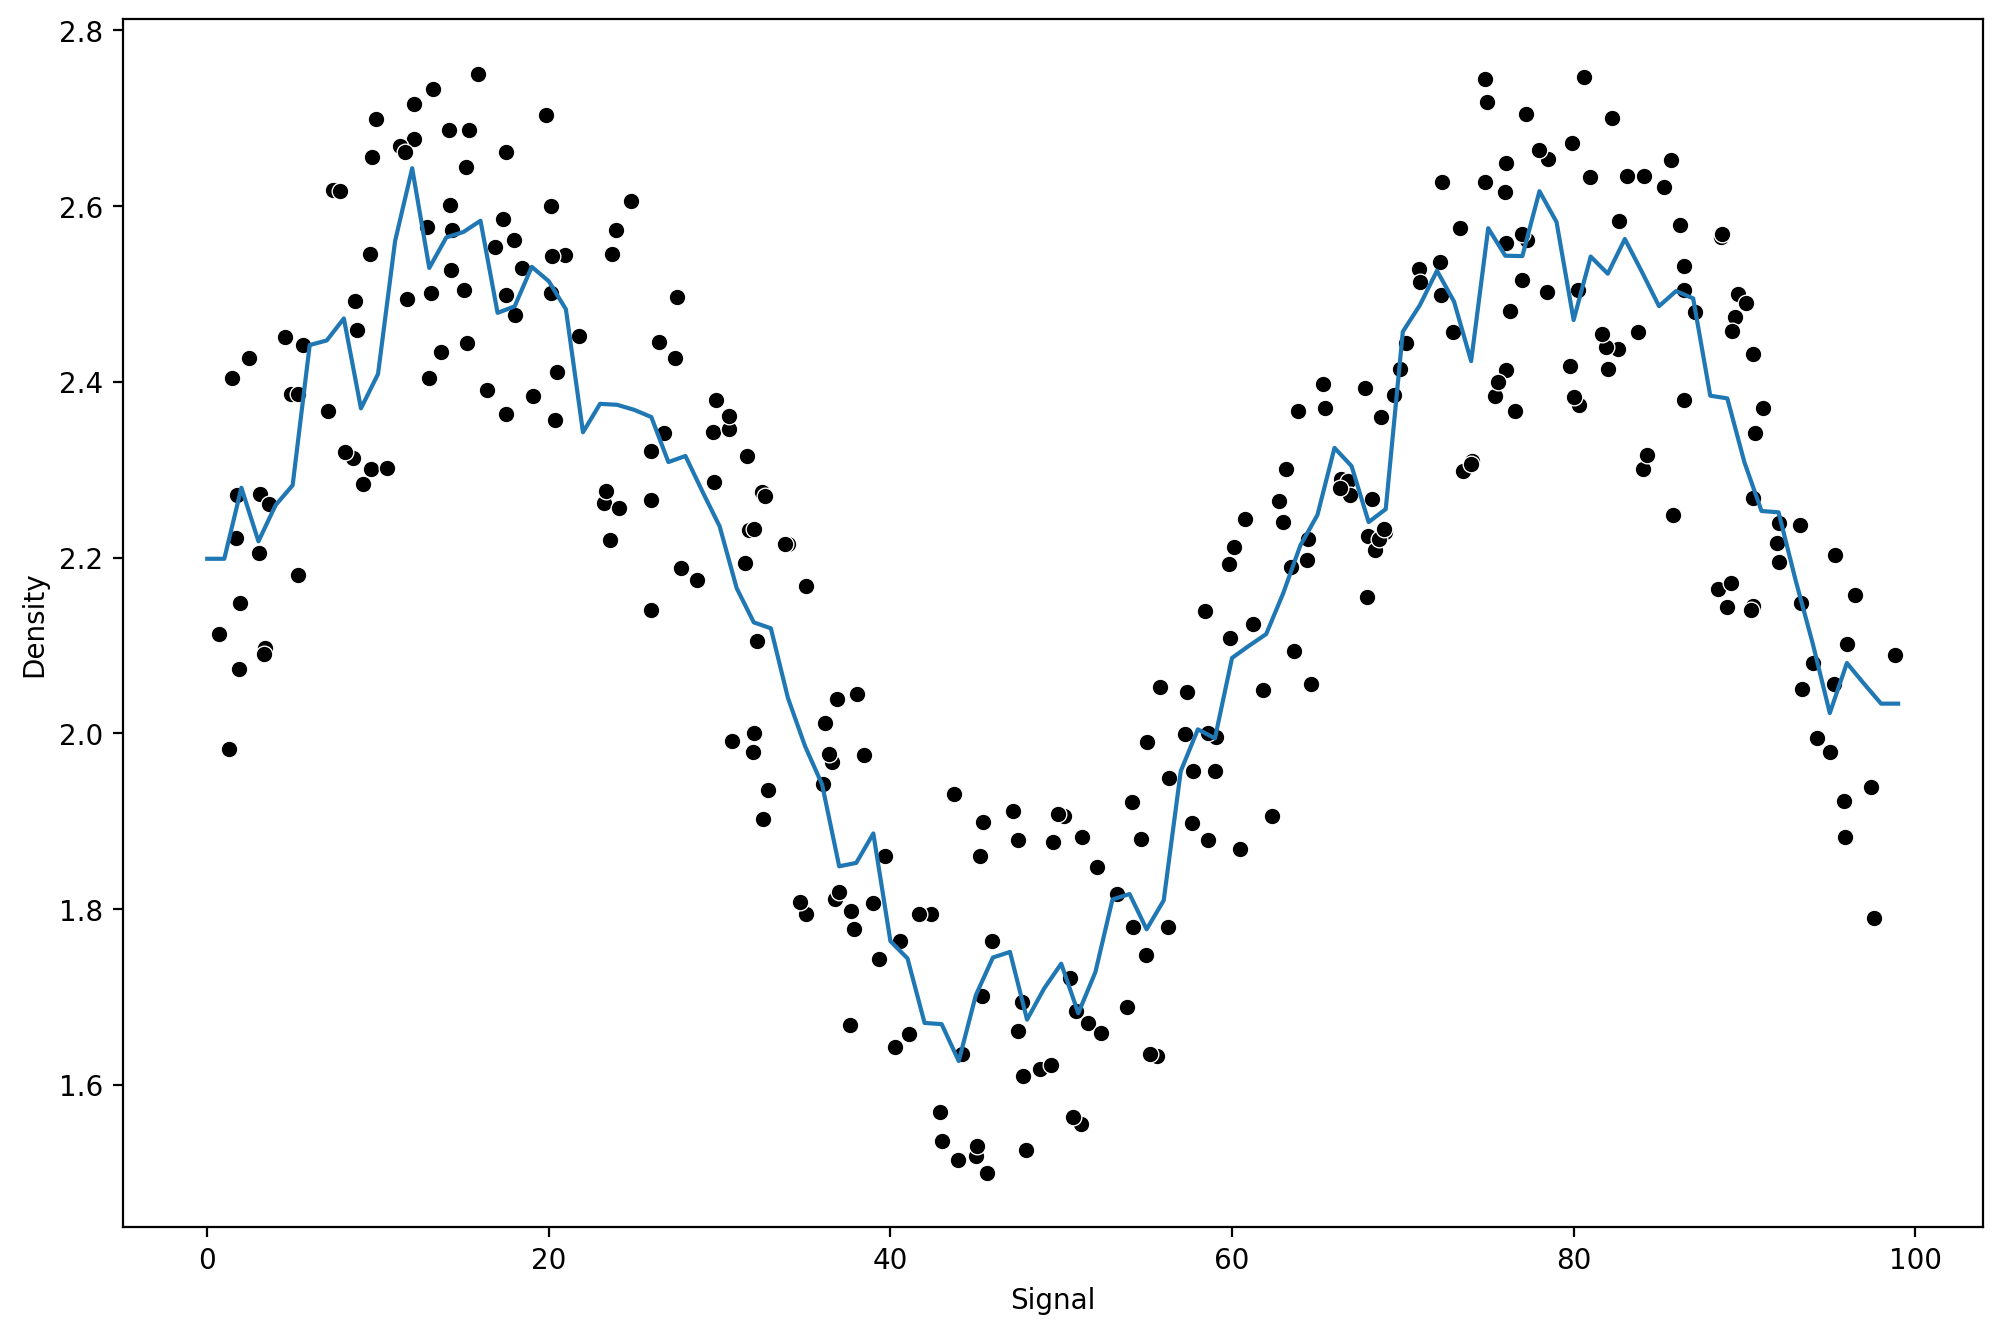

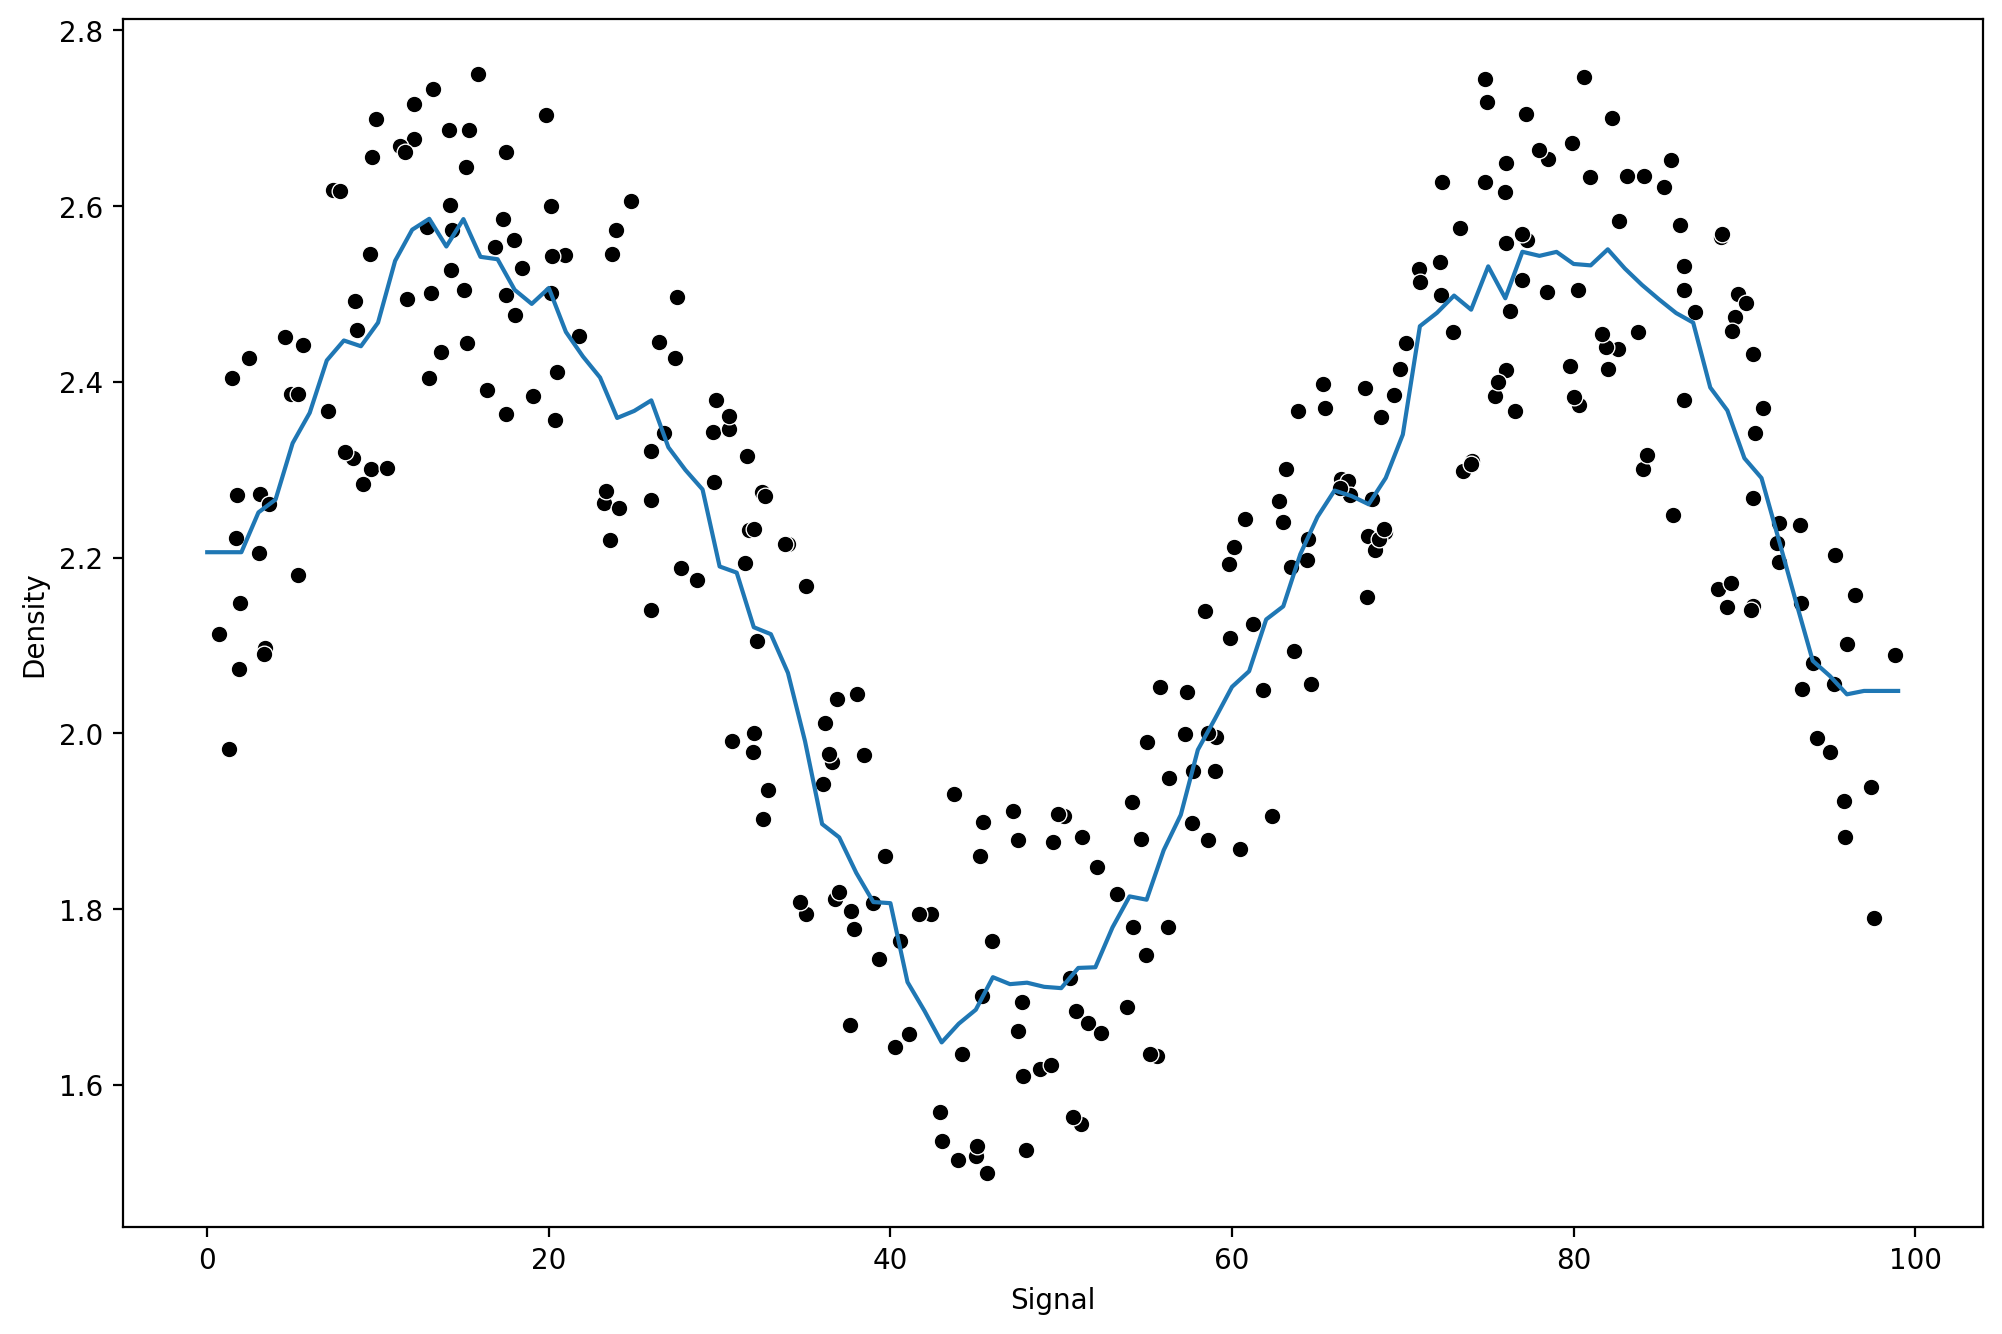

In [93]:
k_values = [1,5,10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

## DTR

In [88]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


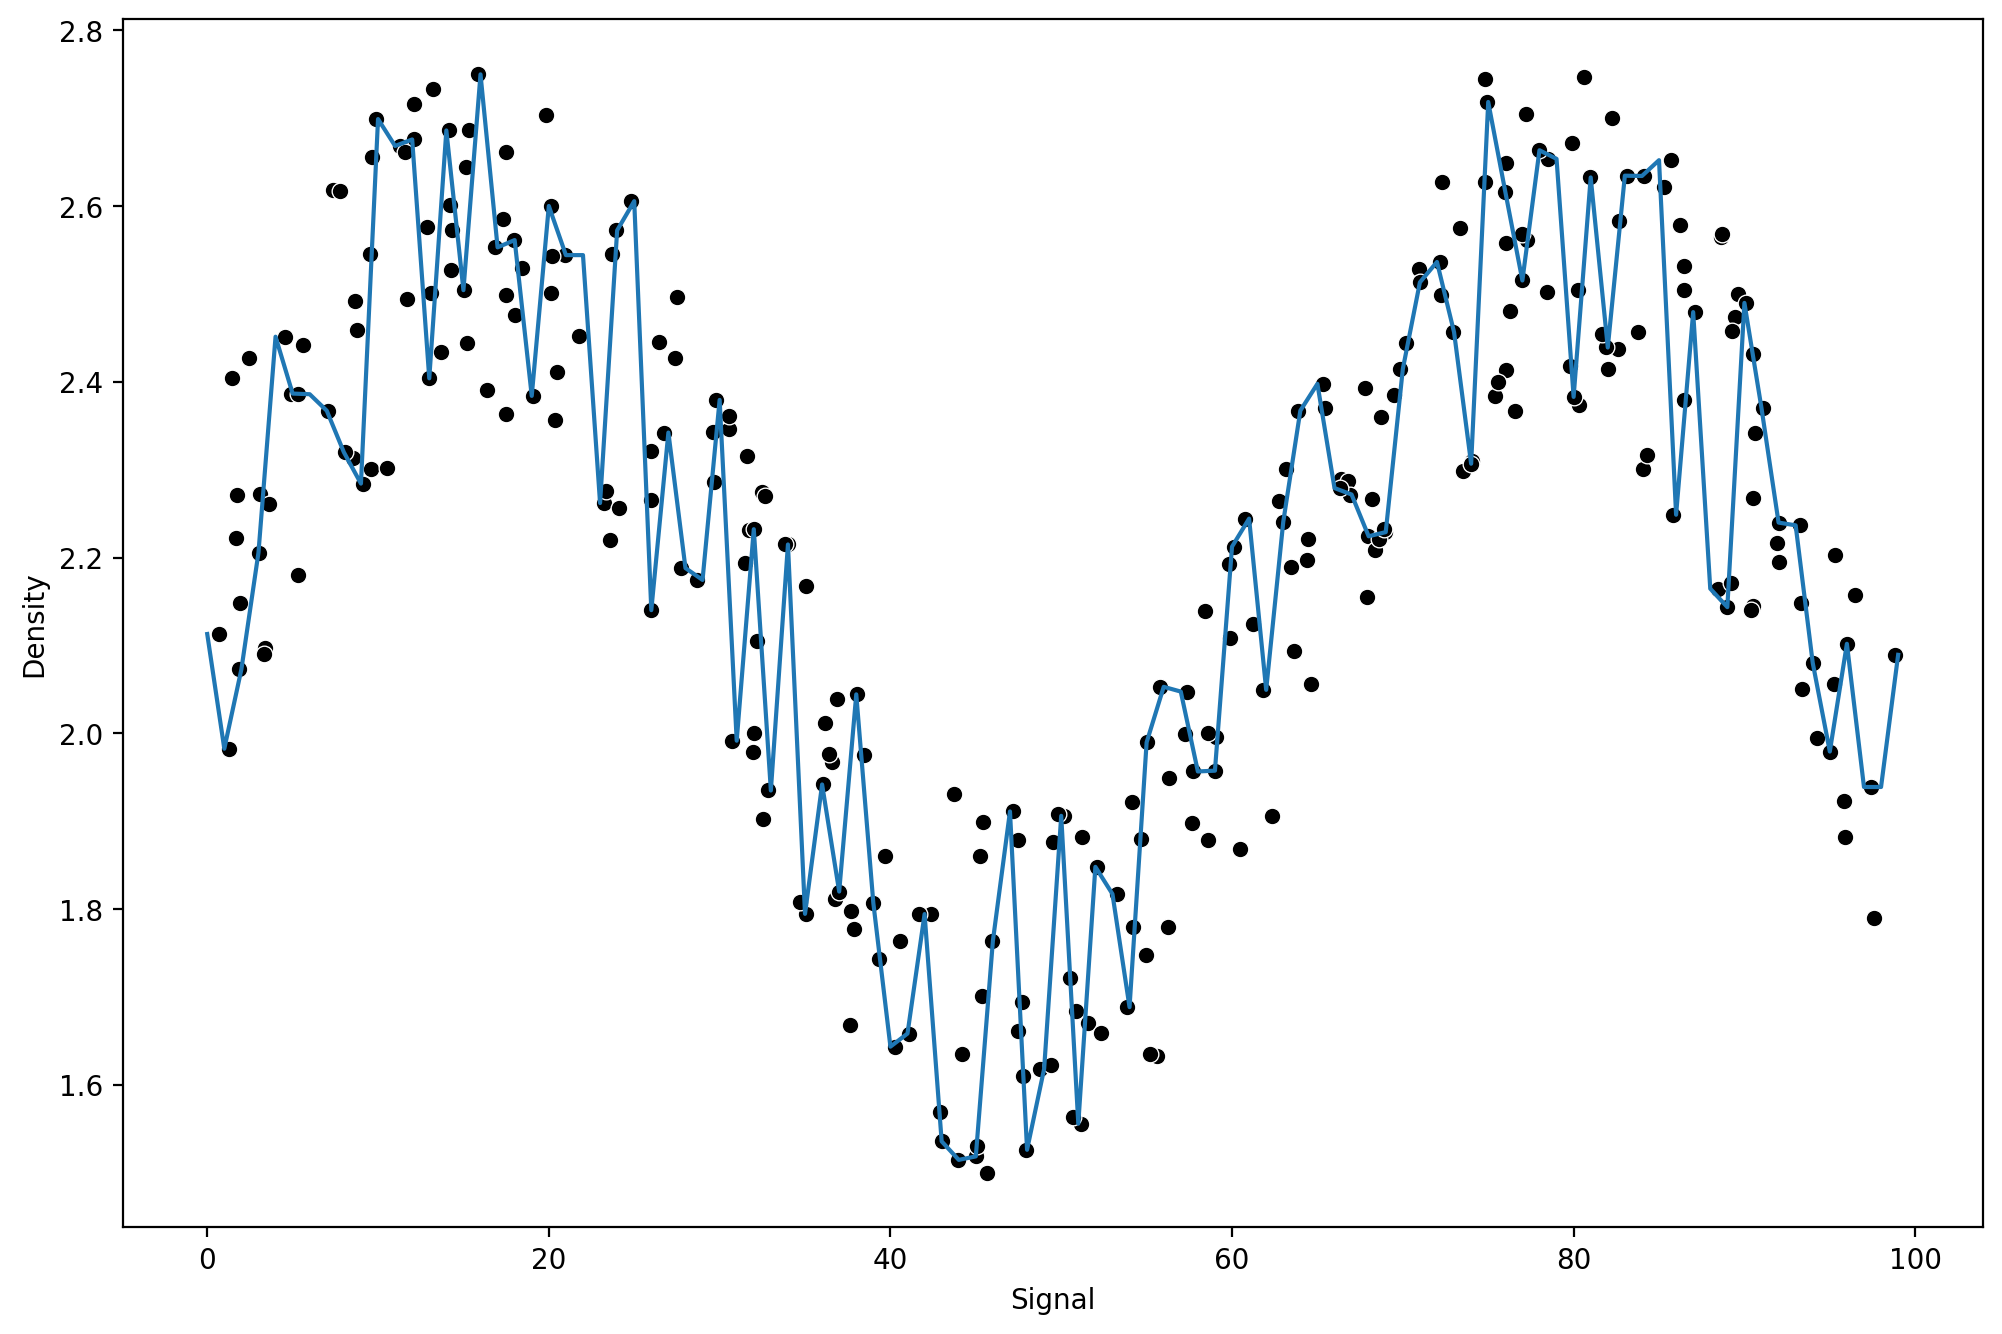

In [94]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

## SVR

In [90]:
from sklearn.svm import SVR

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],
              'gamma':['auto','scale']}


grid = GridSearchCV(svr,param_grid)

MAE: 0.10854210121348368
RMSE: 0.12646999302046696


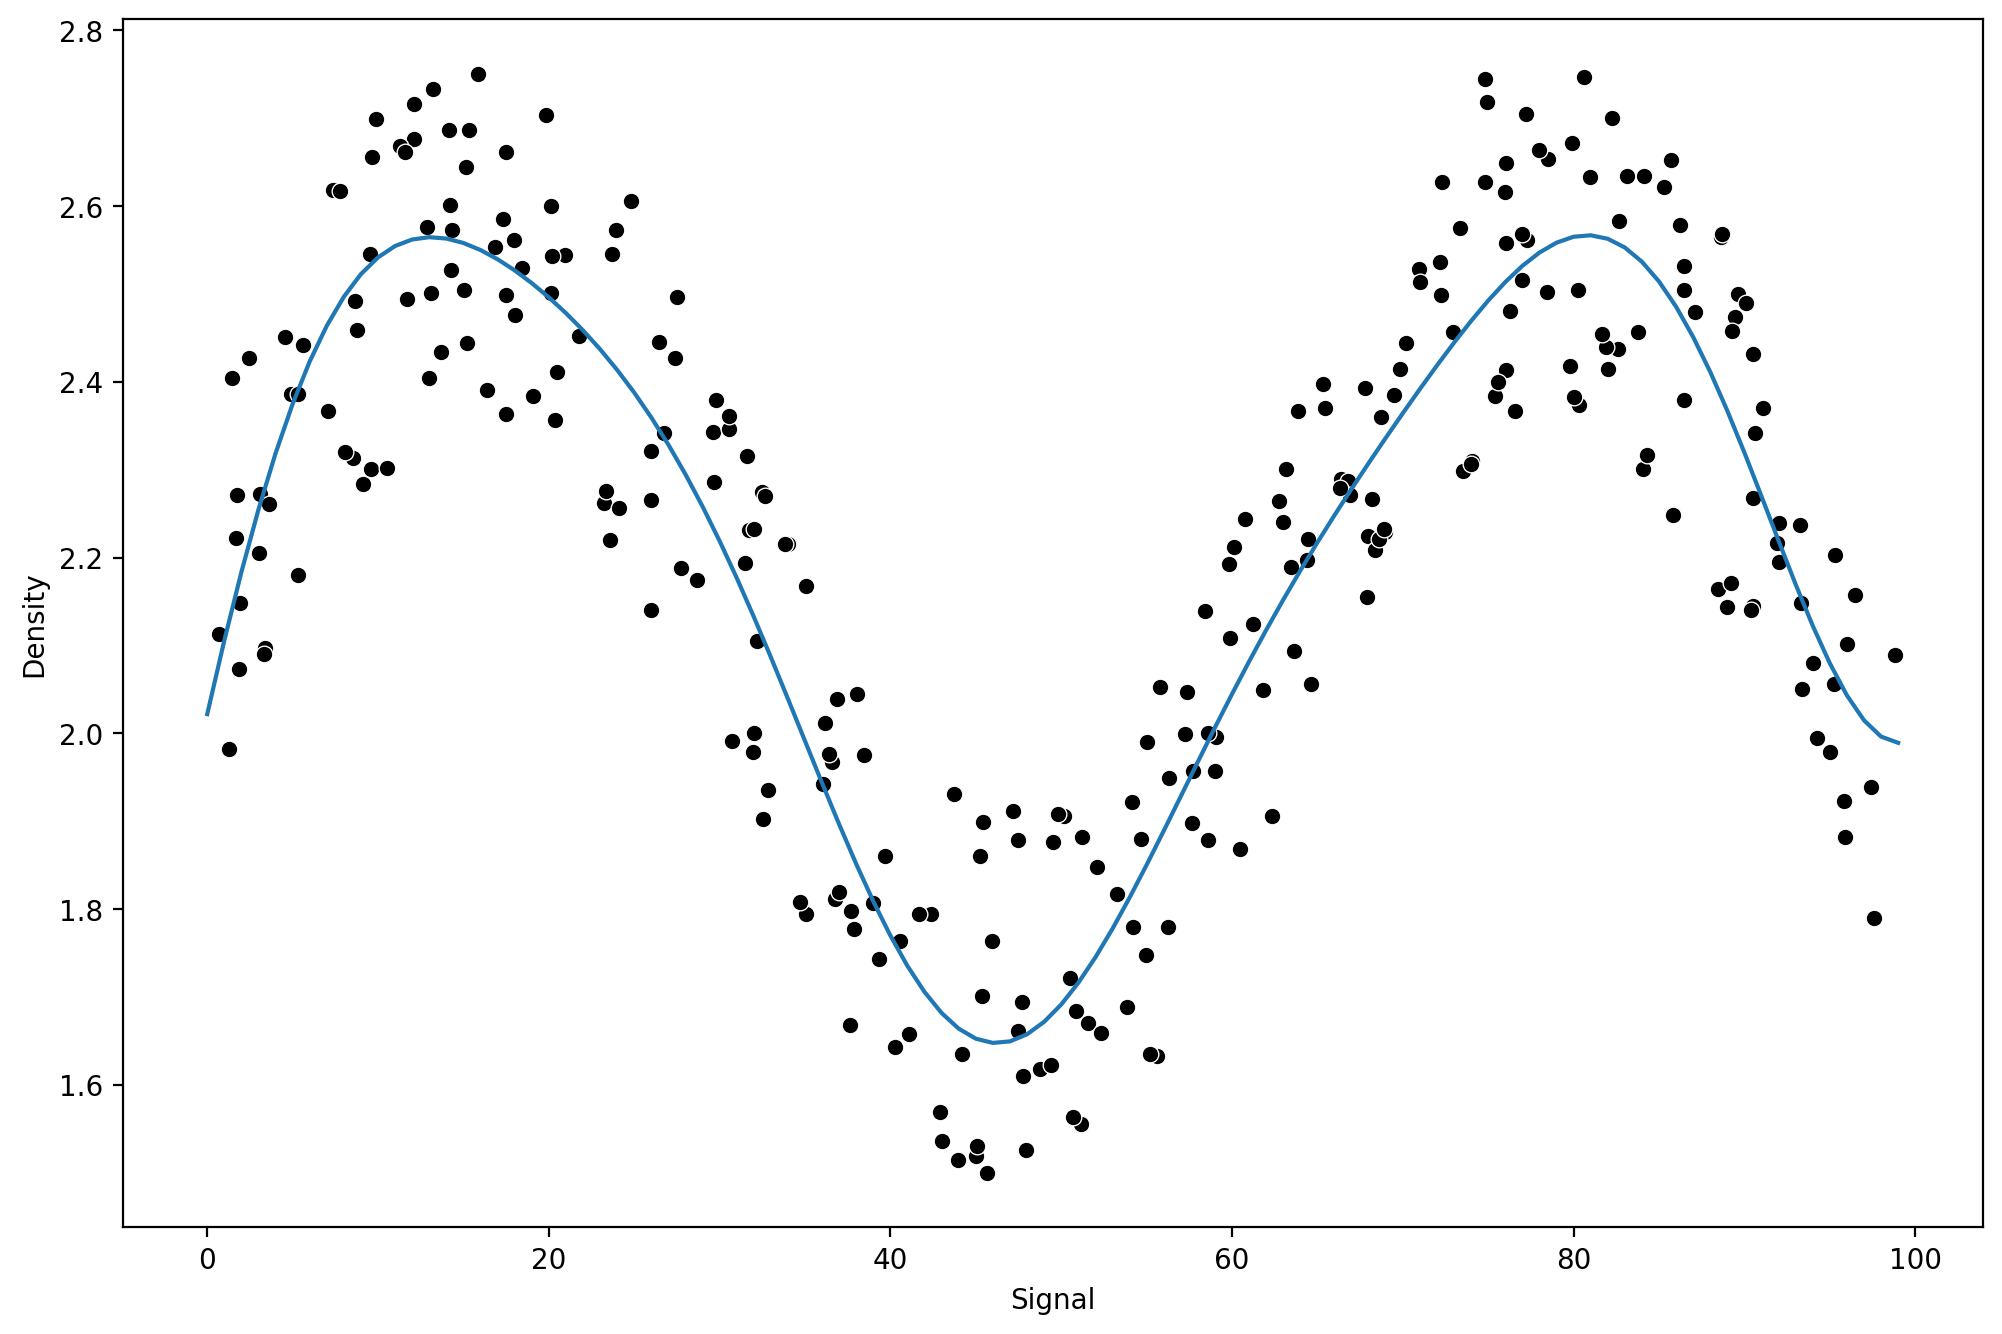

In [97]:
run_model(grid,X_train,y_train,X_test,y_test)

## RFR

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
rfr = RandomForestRegressor(n_estimators=10)

MAE: 0.118810972966259
RMSE: 0.14077768765078547


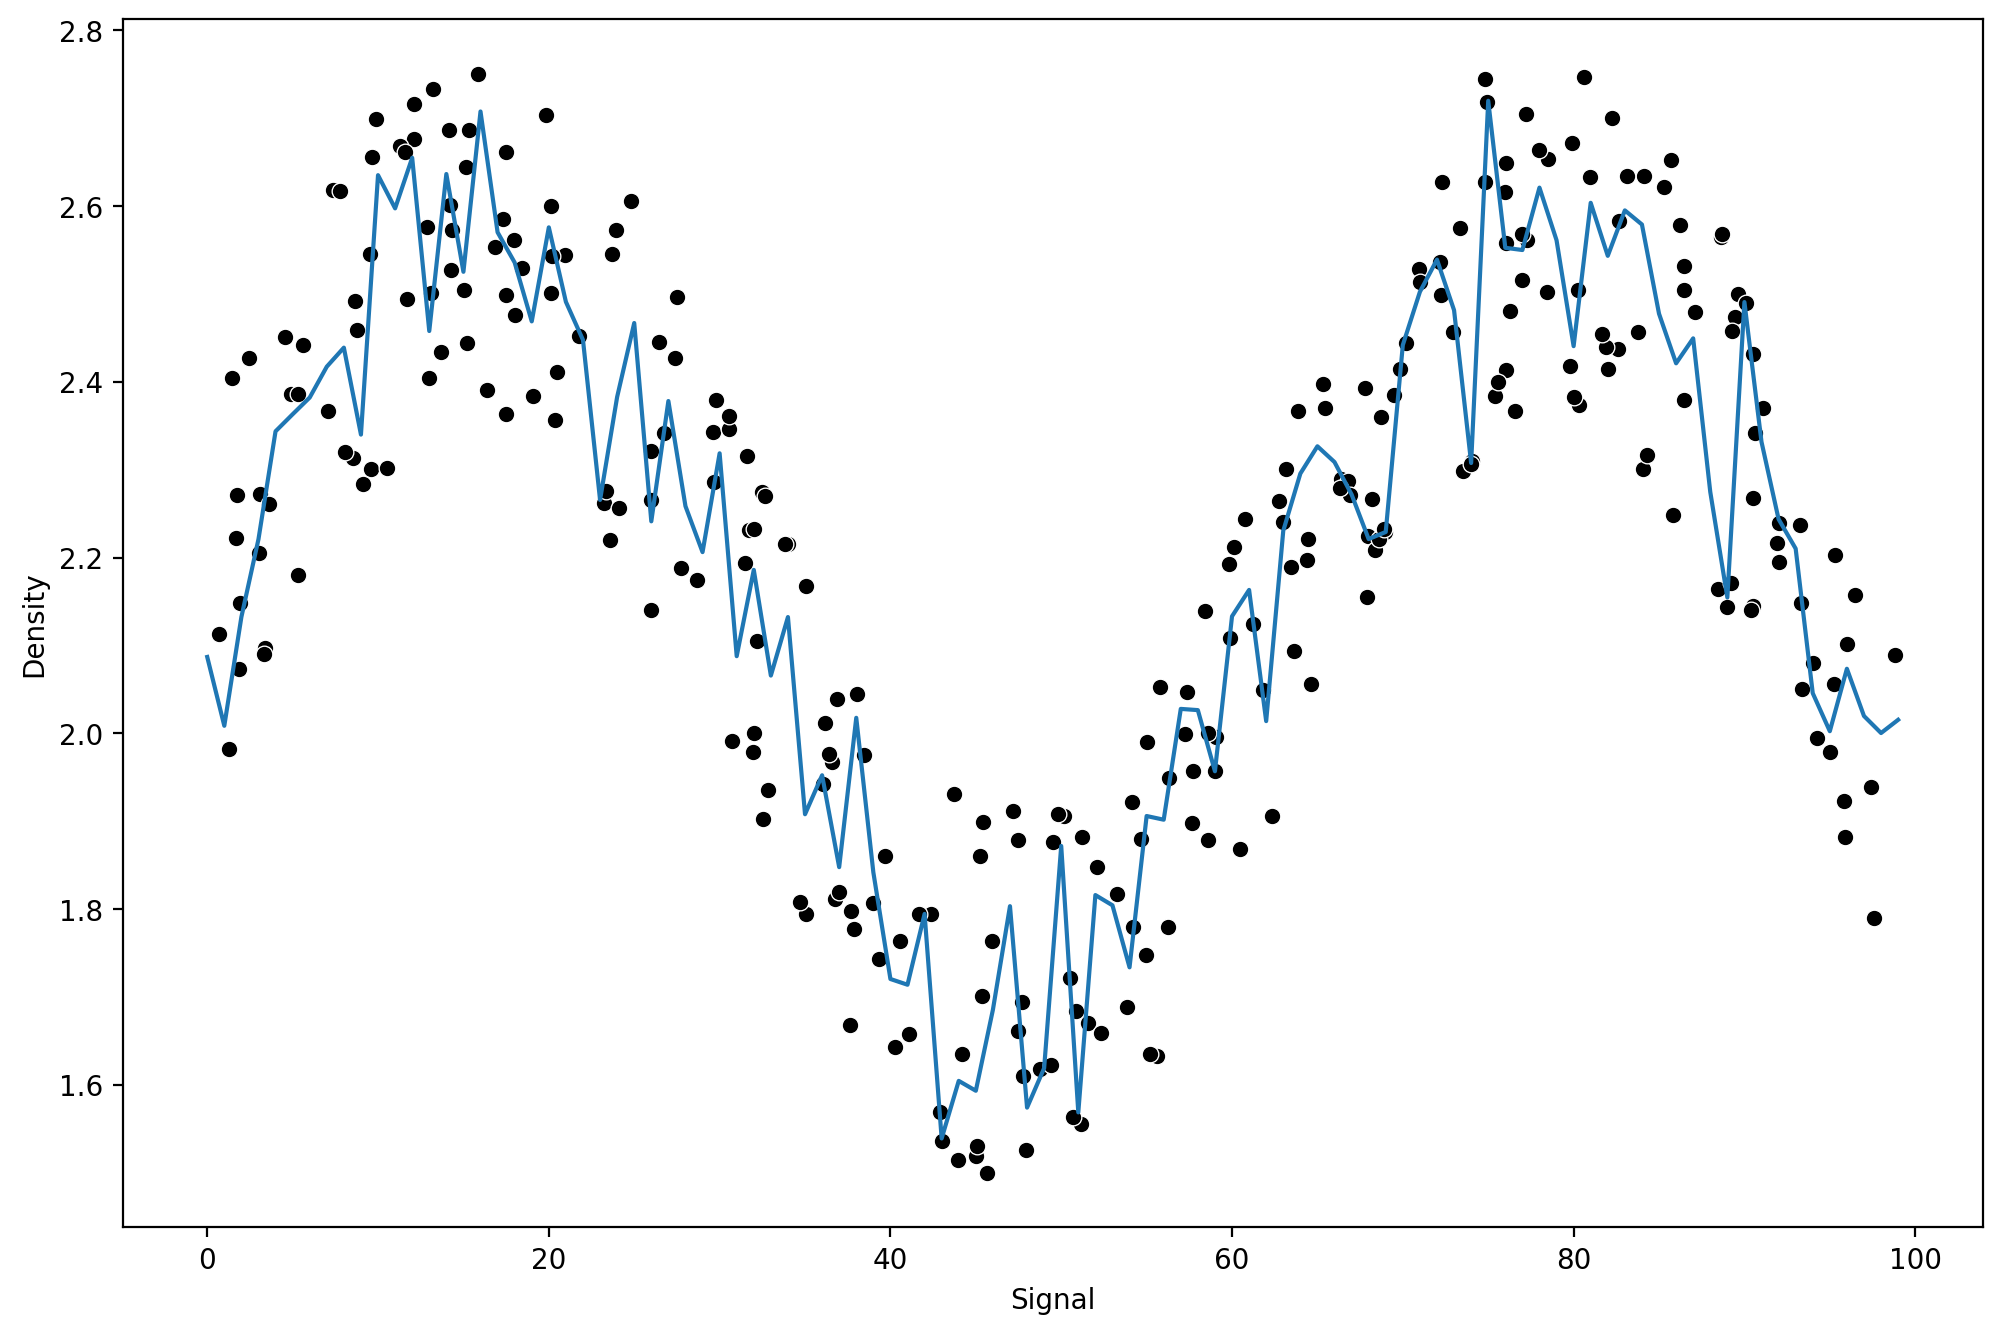

In [99]:
run_model(rfr,X_train,y_train,X_test,y_test)